<a href="https://colab.research.google.com/github/Sdraziw/C-/blob/main/prevendo_doencas_cardiacas_com_machine_learning_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo deste trabalho é identificar o risco de doenças cardíacas com base no conceito de machine learning. Serão apresentados conceitos e ferramentas do universo da inteligência artificial que serão aplicados ao aprendizado de máquina, ou machine learning, e resultarão em um modelo que conseguirá prever doenças cardíacas em determinada população.

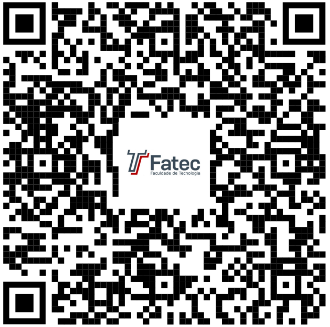

'https://colab.research.google.com/drive/1d1daB_jb9eX2Pz7sV-DMJWDY3hpN258W?usp=sharing'

In [ ]:
from PIL import Image
from IPython.display import display
image_path = 'QRCODE_CARDIO.png'
image = Image.open(image_path)
display(image)
'https://colab.research.google.com/drive/1d1daB_jb9eX2Pz7sV-DMJWDY3hpN258W?usp=sharing'

# Prevendo doenças cardíacas com Machine Learning - Solução

## Instalação

In [ ]:
!pip install numpy pandas matplotlib shap #instala numpy pandas matplotlib shap
'''Retirar comentário '#' caso iniciar do projeto'''

"Retirar comentário '#' caso iniciar do projeto"

### Bibliotecas Python

### Importações

- **numpy (np):** Biblioteca extremamente poderosa para computação numérica em Python. Oferece suporte a arrays e matrizes multidimensionais, juntamente com uma grande coleção de funções matemáticas de alto nível para operar nesses arrays. Renomeada como `np` para facilitar a referência em todo o código.

- **pandas (pd):** Biblioteca essencial para manipulação e análise de dados em Python. Oferece estruturas de dados de alto desempenho e fáceis de usar, como DataFrame e Series, além de fornecer diversas funções para lidar com dados ausentes, transformações de dados e agregações. Renomeada como `pd` para facilitar a referência em todo o código.

- **matplotlib.pyplot (plt):** Módulo de plotagem da biblioteca Matplotlib, amplamente utilizada para criação de gráficos estáticos em Python. Oferece uma interface semelhante à do MATLAB, permitindo a criação de uma variedade de gráficos, como histogramas, gráficos de dispersão e gráficos de linha. Renomeado como `plt` para facilitar a referência em todo o código.

- **plotly.graph_objects (go):** Módulo da biblioteca Plotly usado para criar visualizações interativas e de alta qualidade em Python. Oferece suporte a uma variedade de gráficos, incluindo gráficos de dispersão 3D, gráficos de superfície e gráficos de caixa. Renomeado como `go` para facilitar a referência em todo o código.

- **shap:** Biblioteca especializada em explicar as previsões dos modelos de aprendizado de máquina. Baseia-se no conceito de valores SHAP (SHapley Additive exPlanations), que fornecem uma maneira de entender como cada recurso contribui para a previsão do modelo. Essencial para análise e interpretação de modelos de machine learning.


In [ ]:
import numpy as np  # Importa a biblioteca numpy e a renomeia como np
import pandas as pd  # Importa a biblioteca pandas e a renomeia como pdS
import matplotlib.pyplot as plt  # Importa o módulo pyplot da biblioteca matplotlib e a renomeia como plt
import plotly.graph_objects as go  # Importa o módulo 'graph_objects' da biblioteca Plotly e renomeia-o como 'go'
import shap # Importa a biblioteca shap para explicar as previsões do modelo e calcular valores SHAP

### + Módulos ou Submódulos das Bibliotecas Python

In [ ]:
from sklearn.model_selection import train_test_split # Importa a função train_test_split da biblioteca scikit-learn para dividir os dados em conjuntos de treino e teste
from sklearn.ensemble import RandomForestClassifier # Importa a classe RandomForestClassifier da biblioteca scikit-learn para criar um modelo de Random Forest
from sklearn.inspection import permutation_importance# Importa a função permutation_importance da biblioteca scikit-learn para calcular a importância das características por permutação
from sklearn.model_selection import train_test_split # Esta função é utilizada para dividir um conjunto de dados em duas partes: uma para treinamento do modelo e outra para teste do modelo. Essa separação é essencial para avaliar o desempenho do modelo de machine learning em dados não vistos durante o treinamento.
from sklearn.metrics import classification_report # Gera um relatório de classificação que contém métricas como precisão, recall, F1-score e suporte para cada classe do modelo de classificação. Essas métricas fornecem uma visão abrangente do desempenho do modelo em cada classe.
from sklearn.metrics import confusion_matrix  # Calcula a matriz de confusão, que é uma tabela que descreve o desempenho do modelo de classificação. Ela mostra o número de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos, permitindo uma análise mais detalhada do comportamento do modelo em relação às diferentes classes.

In [ ]:
df_cardio = pd.read_csv("cardio_train.csv", sep=",", index_col=0)
#pd.read_csv("cardio_train.csv"): Isso lê o arquivo CSV denominado "cardio_train.csv" e carrega seus dados em um DataFrame do Pandas. O arquivo CSV é geralmente usado para armazenar dados tabulares, onde as informações são separadas por vírgulas (ou outro delimitador, especificado pelo parâmetro sep).

## Análise geral dos dados

| Característica                                | Tipo de Variável     | Variável    | Tipo de Valor                                      |   |
|-----------------------------------------------|---------------------|-------------|--------------------------------------------------|---|
| Idade                                         | Característica Objetiva   | idade         | int (dias)                                       |   |
| Altura                                        | Característica Objetiva   | altura      | int (cm)                                         |   |
| Peso                                          | Característica Objetiva   | peso      | float (kg)                                       |   |
| Gênero                                        | Característica Objetiva   | gênero      | código categórico 1 Mulher, 2 Homem                               |   |
| Pressão arterial sistólica                   | Característica de Exame | ap_hi       | int                                              |   |
| Pressão arterial diastólica                  | Característica de Exame | ap_lo       | int                                              |   |
| Colesterol                                   | Característica de Exame | colesterol | 1: normal, 2: acima do normal, 3: muito acima do normal |   |
| Glicose                                       | Característica de Exame | glicose        | 1: normal, 2: acima do normal, 3: muito acima do normal |   |
| Fumante                                       | Característica Subjetiva  | fumante       | binário                                           |   |
| Consumo de Álcool                             | Característica Subjetiva  | alco       | binário                                           |   |
| Atividade Física                              | Característica Subjetiva  | ativo      | binário                                           |   |
| Presença ou Ausência de Doença Cardiovascular | Variável Alvo     | cardio      | binário                                           |   |
| IMC (Índice de massa corporal) | Objetiva Calculada *Temporária*     | bmi      | float derivada de (peso) / (altura/100)²                                           |   |


In [ ]:
print("Número de pessoas no arquivo CSV:", len(df_cardio)) # tamanho da base
'''Fonte: https://www.kaggle.com/code/vbmokin/20-models-for-cardiovascular-disease-prediction/input'''

Número de pessoas no arquivo CSV: 70000


'Fonte: https://www.kaggle.com/code/vbmokin/20-models-for-cardiovascular-disease-prediction/input'

### Exibição de Dados Originais

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convertendo a coluna "age" para o tipo de dados numéricos (int ou float)
df_cardio["age"] = pd.to_numeric(df_cardio["age"], errors='coerce')

# Criando o gráfico com as caixas (boxplot)
fig = make_subplots(rows=5, cols=1)  # Linhas e colunas

# O gráfico resultante mostrará a distribuição da idade dos dados em formato de boxplot.
fig.add_trace(go.Box(x=df_cardio["age"] / 365, name="Idade"), row=1, col=1)
fig.add_trace(go.Box(x=df_cardio["weight"], name="Peso"), row=2, col=1)
fig.add_trace(go.Box(x=df_cardio["height"], name="Altura"), row=3, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_hi"], name="Pressão sanguínea sistólica"), row=4, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_lo"], name="Pressão sanguínea diastólica"), row=5, col=1)

fig.update_layout(height=300, title_text="Dados numéricos (BOX-PLOT) População Cardiovascular")
# template="plotly_dark", reirado do parênteses

# Definir a altura do layout para 700 pixels
fig.update_layout(height=500)

# Exibir o gráfico
fig.show()


In [ ]:
df_cardio.head()# default 5 exibe apenas as primeiras cinco linhas, sem bmi (body mass index)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

## Tratamento de dados

In [ ]:
# Número de linhas antes da remoção das duplicatas
num_linhas_antes = len(df_cardio)

# Removendo linhas duplicadas do DataFrame
df_cardio.drop_duplicates(inplace=True)

# Número de linhas após a remoção das duplicatas
num_linhas_depois = len(df_cardio)

# Imprimindo o número de linhas antes e depois da remoção das duplicatas
print("Número de linhas antes da remoção das duplicatas:", num_linhas_antes)
print("Número de linhas após a remoção das duplicatas:", num_linhas_depois)

# Motivo de tratar duplicados devido a não influenciar com redundância resultatos de mesmos pesos, vide conclusão

Número de linhas antes da remoção das duplicatas: 70000
Número de linhas após a remoção das duplicatas: 70000


### Limitando resultados sistólica e diastólica

In [ ]:
# Número de linhas antes da remoção sistólica e diastólica
num_linhas_antes = len(df_cardio)
# Imprimindo o número de linhas antes e depois da remoção sistólica e diastólica no final
print("Número de linhas antes da remoção de extremos sistólica e diastólica:", num_linhas_antes)

# Calcula o índice de massa corporal (IMC) e adiciona uma coluna "bmi" ao DataFrame
df_cardio["bmi"] = (df_cardio["weight"] / (df_cardio["height"]/100)**2)
# Corrige a contagem de valores extremos de ap_hi
count_extreme_ap_hi = ((df_cardio["ap_hi"] < 55) | (df_cardio["ap_hi"] > 250)).sum()
print("Valores extremos de ap_hi:", count_extreme_ap_hi)
# Corrige a contagem de valores extremos de ap_lo
count_extreme_ap_lo = ((df_cardio["ap_lo"] < 35) | (df_cardio["ap_lo"] > 200)).sum()

# Contagem total de valores extremos
count_total_extreme = count_extreme_ap_hi + count_extreme_ap_lo

print("Valores extremos de ap_lo:", count_extreme_ap_lo)
print("Total de valores extremos:", count_total_extreme)
# Filtra valores extremos de pressão sanguínea sistólica e diastólica
out_filter = ((df_cardio["ap_hi"] < 55) | (df_cardio["ap_hi"] > 250) | (df_cardio["ap_lo"] < 35) | (df_cardio["ap_lo"] > 200))
df_cardio = df_cardio[~out_filter]#diferente de vira NOT inverte tudo
# Fonte: https://sanarmed.com/sistole-e-diastole-passo-a-passo-para-entender-o-ciclo-cardiaco-projetoq2-2022/

# Tamanho do DataFrame após as manipulações
final_df_size = len(df_cardio)

print("Total de dados extremos (incluindo intersceção):", final_df_size)

# Subtraindo o número total de valores extremos do número de linhas antes da remoção
print("Número de linhas após a remoção:", num_linhas_antes - count_total_extreme)


Número de linhas antes da remoção de extremos sistólica e diastólica: 70000
Valores extremos de ap_hi: 228
Valores extremos de ap_lo: 1012
Total de valores extremos: 1240
Total de dados extremos (incluindo intersceção): 68775
Número de linhas após a remoção: 68760


### Categorização de IMC

In [ ]:
# Função para categorizar o IMC com códigos numéricos
def categorize_imc_numeric(imc):
    if imc < 18.5:
        return 0  # Abaixo do Peso
    elif 18.5 <= imc < 25:
        return 1  # Peso Normal
    elif 25 <= imc < 30:
        return 2  # Sobrepeso
    elif 30 <= imc < 35:
        return 3  # Obesidade (grau I)
    elif 35 <= imc < 40:
        return 4  # Obesidade (grau II)
    else:
        return 5  # Obesidade (grau III ou Mórbida)

# Criando uma nova coluna "imc_category_numeric" no DataFrame com os códigos numéricos
df_cardio["bmi_category_numeric"] = df_cardio["bmi"].apply(categorize_imc_numeric)

# Visualizando as primeiras linhas do DataFrame com a nova coluna numérica
print(df_cardio[["bmi", "bmi_category_numeric"]].head())

         bmi  bmi_category_numeric
0  21.967120                     1
1  34.927679                     3
2  23.507805                     1
3  28.710479                     2
4  23.011177                     1


|Numérico| Categorização de IMC          | Valor       |
|-|-------------------------------|-------------|
|0| Abaixo do peso               | IMC < 18.5  |
|1| Peso normal                  | 18.5 ≤ IMC ≤ 24.9 |
|2| Sobrepeso                    | 25 ≤ IMC ≤ 29.9   |
|3| Obesidade (grau I)           | 30 ≤ IMC ≤ 34.9   |
|4| Obesidade (grau II)          | 35 ≤ IMC ≤ 39.9   |
|5| Obesidade (grau III ou mórbida) | IMC ≥ 40    |

In [ ]:
# Encontrando o maior e o menor IMC existente no DataFrame
maior_imc = df_cardio["bmi"].max()  # Encontra o maior valor na coluna "bmi"
menor_imc = df_cardio["bmi"].min()  # Encontra o menor valor na coluna "bmi"

# Imprime o maior e o menor IMC existente no DataFrame
print("Maior IMC existente:", maior_imc)
print("Menor IMC existente:", menor_imc)

Maior IMC existente: 298.6666666666667
Menor IMC existente: 3.471783865673526


#### Maiores e menores valores nas variáveis (comparação)

In [ ]:
# Maiores valores para cada variável
for column in df_cardio.columns:
    if column != 'id' and column != 'gender' and column != 'cardio' and column != 'cholesterol':
        max_value = df_cardio[column].max()
        print(f'> de {column}: {max_value}')

> de age: 23713
> de height: 250
> de weight: 200.0
> de ap_hi: 240
> de ap_lo: 190
> de gluc: 3
> de smoke: 1
> de alco: 1
> de active: 1
> de bmi: 298.6666666666667
> de bmi_category_numeric: 5


In [ ]:
# menores valores para cada variável
for column in df_cardio.columns:
    if column != 'id' and column != 'gender' and column != 'cardio' and column != 'cholesterol':
        min_value = df_cardio[column].min()
        print(f'< de {column}: {min_value}')

< de age: 10798
< de height: 55
< de weight: 11.0
< de ap_hi: 60
< de ap_lo: 40
< de gluc: 1
< de smoke: 0
< de alco: 0
< de active: 0
< de bmi: 3.471783865673526
< de bmi_category_numeric: 0


### Limitando resultados IMC

In [ ]:
# Número de linhas antes da remoção
num_linhas_antes = len(df_cardio)
# Imprimindo o número de linhas antes e depois da remoção
print("Número de linhas antes da remoção de extremos IMC:", num_linhas_antes)

# Contagem de valores extremos de IMC antes da remoção
count_extreme_bmi = ((df_cardio["bmi"] < 10) | (df_cardio["bmi"] > 50)).sum()
print("Valores extremos de IMC antes da remoção:", count_extreme_bmi)

# Filtrando valores extremos de IMC (índice de massa corporal)
out_bmi_filter = (df_cardio["bmi"] < 10) | (df_cardio["bmi"] > 50)
df_cardio = df_cardio[~out_bmi_filter]

# Tamanho do DataFrame após as manipulações do IMC
final_df_size_after_bmi_filter = len(df_cardio)

print("Tamanho do DataFrame após a remoção de valores extremos de IMC:", final_df_size_after_bmi_filter)

Número de linhas antes da remoção de extremos IMC: 68775
Valores extremos de IMC antes da remoção: 240
Tamanho do DataFrame após a remoção de valores extremos de IMC: 68535


#### Dados Tratados non-null

In [ ]:
df_cardio.info() # QTD dados da planilha

<class 'pandas.core.frame.DataFrame'>
Index: 68535 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    68535 non-null  int64  
 1   age                   68535 non-null  int64  
 2   gender                68535 non-null  int64  
 3   height                68535 non-null  int64  
 4   weight                68535 non-null  float64
 5   ap_hi                 68535 non-null  int64  
 6   ap_lo                 68535 non-null  int64  
 7   cholesterol           68535 non-null  int64  
 8   gluc                  68535 non-null  int64  
 9   smoke                 68535 non-null  int64  
 10  alco                  68535 non-null  int64  
 11  active                68535 non-null  int64  
 12  cardio                68535 non-null  int64  
 13  bmi                   68535 non-null  float64
 14  bmi_category_numeric  68535 non-null  int64  
dtypes: float64(2), int64(13)

### Removendo IMC (utilizado apenas para apurar)

In [ ]:
#### Remove as colunas "bmi" e "bmi_category_numeric" (Multicolinearidade)
df_cardio.drop(["bmi", "bmi_category_numeric"], axis=1, inplace=True)
df_cardio.head(1)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   

   alco  active  cardio  
0     0       1       0

## Análise exploratória dos dados (EDA)

### Dados numéricos (BOX-PLOT)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convertendo a coluna "age" para o tipo de dados numéricos (int ou float)
df_cardio["age"] = pd.to_numeric(df_cardio["age"], errors='coerce')

# Criando o gráfico com as caixas (boxplot)
fig = make_subplots(rows=5, cols=1)  # Linhas e colunas

# O gráfico resultante mostrará a distribuição da idade dos dados em formato de boxplot.
fig.add_trace(go.Box(x=df_cardio["age"] / 365, name="Idade"), row=1, col=1)
fig.add_trace(go.Box(x=df_cardio["weight"], name="Peso"), row=2, col=1)
fig.add_trace(go.Box(x=df_cardio["height"], name="Altura"), row=3, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_hi"], name="Pressão sanguínea sistólica"), row=4, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_lo"], name="Pressão sanguínea diastólica"), row=5, col=1)

# Não convém usar IMC agora mas deixarei o código desenvolvido para casos posteriores a serem analisados
# Adicionar o boxplot ao gráfico, usando os nomes das categorias
#categoria_imc = {
#    0: "Abaixo do Peso",
#    1: "Peso Normal",
#    2: "Sobrepeso",
#    3: "Obesidade (grau I)",
#    4: "Obesidade (grau II)",
#    5: "Obesidade (grau III ou Mórbida)"
#}

#fig.add_trace(go.Box(x=df_cardio["bmi_category_numeric"].apply(lambda x: categoria_imc[x]), name="Categoria corporal"), row=6, col=1)

# Adicionar o boxplot do IMC ao gráfico, utilizando as categorias correspondentes
#fig.add_trace(go.Box(
#    y=df_cardio["bmi"],
#    name="Índice de massa corporal",
#    text=df_cardio["bmi_category_numeric"].apply(lambda x: categoria_imc[x])  # função de Pandas que é usada para aplicar uma função especificada a cada elemento de uma coluna ou linha de um DataFrame.
#), row=7, col=1)

# Ajustar o eixo y para o gráfico de IMC para mostrar corretamente as categorias
#fig.update_yaxes(
#    tickmode='array',
#    tickvals=list(categoria_imc.keys()),
#    ticktext=list(categoria_imc.values()),
#    row=7,
#    col=1
#)

#fig.add_trace(go.Box(x=df_cardio["smoke"], name="Fumante"), row=8, col=1) # não faz sentido trazer em box-plot

fig.update_layout(height=300, title_text="Dados numéricos (BOX-PLOT) População Cardiovascular")
# template="plotly_dark", reirado do parênteses

# Definir a altura do layout para 700 pixels
fig.update_layout(height=500)

# Exibir o gráfico
fig.show()


### Dados categóricos

In [ ]:
df_cardio.head(19) # Usado filtro no parênteses para mostar apenas cabeçalho da base com poucos registros

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0    0  18393       2     168    62.0    110     80            1     1      0   
1    1  20228       1     156    85.0    140     90            3     1      0   
2    2  18857       1     165    64.0    130     70            3     1      0   
3    3  17623       2     169    82.0    150    100            1     1      0   
4    4  17474       1     156    56.0    100     60            1     1      0   
5    8  21914       1     151    67.0    120     80            2     2      0   
6    9  22113       1     157    93.0    130     80            3     1      0   
7   12  22584       2     178    95.0    130     90            3     3      0   
8   13  17668       1     158    71.0    110     70            1     1      0   
9   14  19834       1     164    68.0    110     60            1     1      0   
10  15  22530       1     169    80.0    120     80            1     1      0   
11  16  18815       2     173    60.0    120     80            1     1      0   
12  18  14791       2     165    60.0    120     80            1     1      0   
13  21  19809       1     158    78.0    110     70            1     1      0   
14  23  14532       2     181    95.0    130     90            1     1      1   
15  24  16782       2     172   112.0    120     80            1     1      0   
16  25  21296       1     170    75.0    130     70            1     1      0   
17  27  16747       1     158    52.0    110     70            1     3      0   
18  28  17482       1     154    68.0    100     70            1     1      0   

    alco  active  cardio  
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0  
5      0       0       0  
6      0       1       0  
7      0       1       1  
8      0       1       0  
9      0       0       0  
10     0       1       0  
11     0       1       0  
12     0       0       0  
13     0       1       0  
14     1       1       0  
15     0       0       1  
16     0       0       0  
17     0       1       0  
18     0       0       0

### Amostra de Gráfico

#### Distribuição de Características na População Cardiovascular

In [ ]:
from plotly.subplots import make_subplots
#import plotly.graph_objects as go  # Importa o módulo 'graph_objects' da biblioteca Plotly e renomeia-o como 'go'

def plot_graf(df):
    # Criação da figura com subplots
    fig = make_subplots(rows=3, cols=3)

    # Adição das barras em cada subplot
    fig.add_trace(go.Bar(y=df["gender"].value_counts(), x=["Feminino", "Masculino"], name="Gênero"), row=1, col=1)
    fig.add_trace(go.Bar(y=df["cholesterol"].value_counts(), x=["Normal", "Acima do Normal", "Muito acima do normal"], name="Colesterol"), row=1, col=2)
    fig.add_trace(go.Bar(y=df["gluc"].value_counts(), x=["Normal", "Acima do Normal", "Muito acima do normal"], name="Glicose"), row=1, col=3)
    fig.add_trace(go.Bar(y=df["smoke"].value_counts(), x=["Não fumante", "Fumante"], name="Fumante"), row=2, col=1)
    fig.add_trace(go.Bar(y=df["alco"].value_counts(), x=["Não Alcoólatra", "Alcoólatra"], name="Alcoólatra"), row=3, col=1)
    fig.add_trace(go.Bar(y=df["active"].value_counts(), x=["Não Ativo", "Ativo"], name="Ativo"), row=3, col=2)
    fig.add_trace(go.Bar(y=df["cardio"].value_counts(), x=["Não Cardio", "Cardio"], name="Cardio"), row=3, col=3)

    # Atualização do layout
    fig.update_layout(height=400, title_text="Distribuição de Características na População Cardiovascular")
    #template="plotly_dark",
    # Exibição do gráfico
    fig.show()

plot_graf(df_cardio)

In [ ]:
# Apenas indica um nome para o data frame par exibir em gráficos usado em Matiz de correlação
df_cardio.dataframeName = 'alvo cardio'

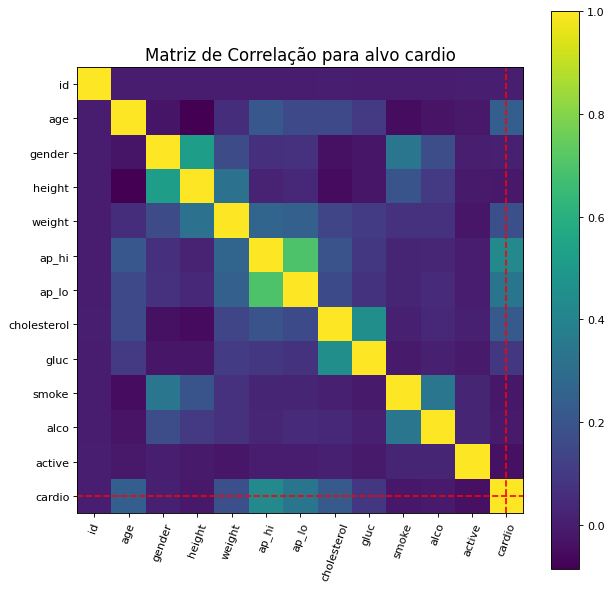

'Mostra um mapa de calor, quanto mais próximo de 1 significa mais correlação'

In [ ]:
'''# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''
# Função para plotar a matriz de correlação
def plotCorrelationMatrix(df, graphWidth):
    # Obtendo o nome do DataFrame
    filename = df.dataframeName

    # Remove colunas com valores ausentes e constantes
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]]

    # Verifica se há pelo menos duas colunas restantes após a remoção das colunas
    if df.shape[1] < 2:
        print(f'Nenhum gráfico de correlação mostrado: o número de colunas non-NaN ou colunas constantes ({df.shape[1]}) é menor que 2')
        return None

    # Calcula a matriz de correlação
    corr = df.corr()

    # Cria a figura para o gráfico
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')

    # Plota a matriz de correlação como um mapa de calor
    corrMat = plt.matshow(corr, fignum=1)

    # Define os rótulos dos eixos x e y
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=70)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()

    # linhas tracejadas vermelhas para destacar a variável "cardio"
    cardio_index = list(corr.columns).index("cardio")
    plt.axvline(x=cardio_index, color='r', linestyle='--')
    plt.axhline(y=cardio_index, color='r', linestyle='--')

    # barra de cores para a matriz de correlação
    plt.colorbar(corrMat)

    # Define o título do gráfico
    plt.title(f'Matriz de Correlação para {filename}', fontsize=15)

    # Exibe o gráfico
    plt.show()

# Exemplo de uso da função
plotCorrelationMatrix(df_cardio, 9)


'Mostra um mapa de calor, quanto mais próximo de 1 significa mais correlação'

### Gráfico de dispersão e densidade

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    # Seleciona apenas colunas numéricas
    df = df.select_dtypes(include=[np.number])

    # Remove colunas com valores nulos
    df = df.dropna(axis=1)

    # Mantém colunas com mais de 1 valor único
    df = df[[col for col in df if df[col].nunique() > 1]]

    # Obtém o nome das colunas
    columnNames = list(df)

    # Reduz o número de colunas para o gráfico
    if len(columnNames) > 10:
        columnNames = columnNames[:10]

    # Seleciona apenas as colunas a serem usadas
    df = df[columnNames]

    # Cria a matriz de dispersão
    ax = pd.plotting.scatter_matrix(df, alpha=0.575, figsize=[plotSize, plotSize], diagonal='kde')

    # Calcula os coeficientes de correlação
    corrs = df.corr().values

    # Adiciona os coeficientes de correlação nos gráficos
    # Loop sobre os índices da matriz triangular superior
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        # Adiciona a anotação de correlação
        ax[i, j].annotate('Coe.cor= %.2f' % corrs[i, j],  # Adiciona uma anotação com o coeficiente de correlação formatado
                          (0.8, 0.2),  # Define a posição da anotação (coordenadas relativas ao eixo)
                          xycoords='axes fraction',  # Usa as coordenadas do eixo para especificar a posição
                          ha='right',  # Alinha horizontalmente a anotação à direita
                          va='center',  # Alinha verticalmente a anotação ao centro
                          size=textSize)  # Define o tamanho do texto da anotação

    # Define o título do gráfico
    plt.title('Gráfico de dispersão e densidade')

    # Exibe o gráfico
    plt.show()


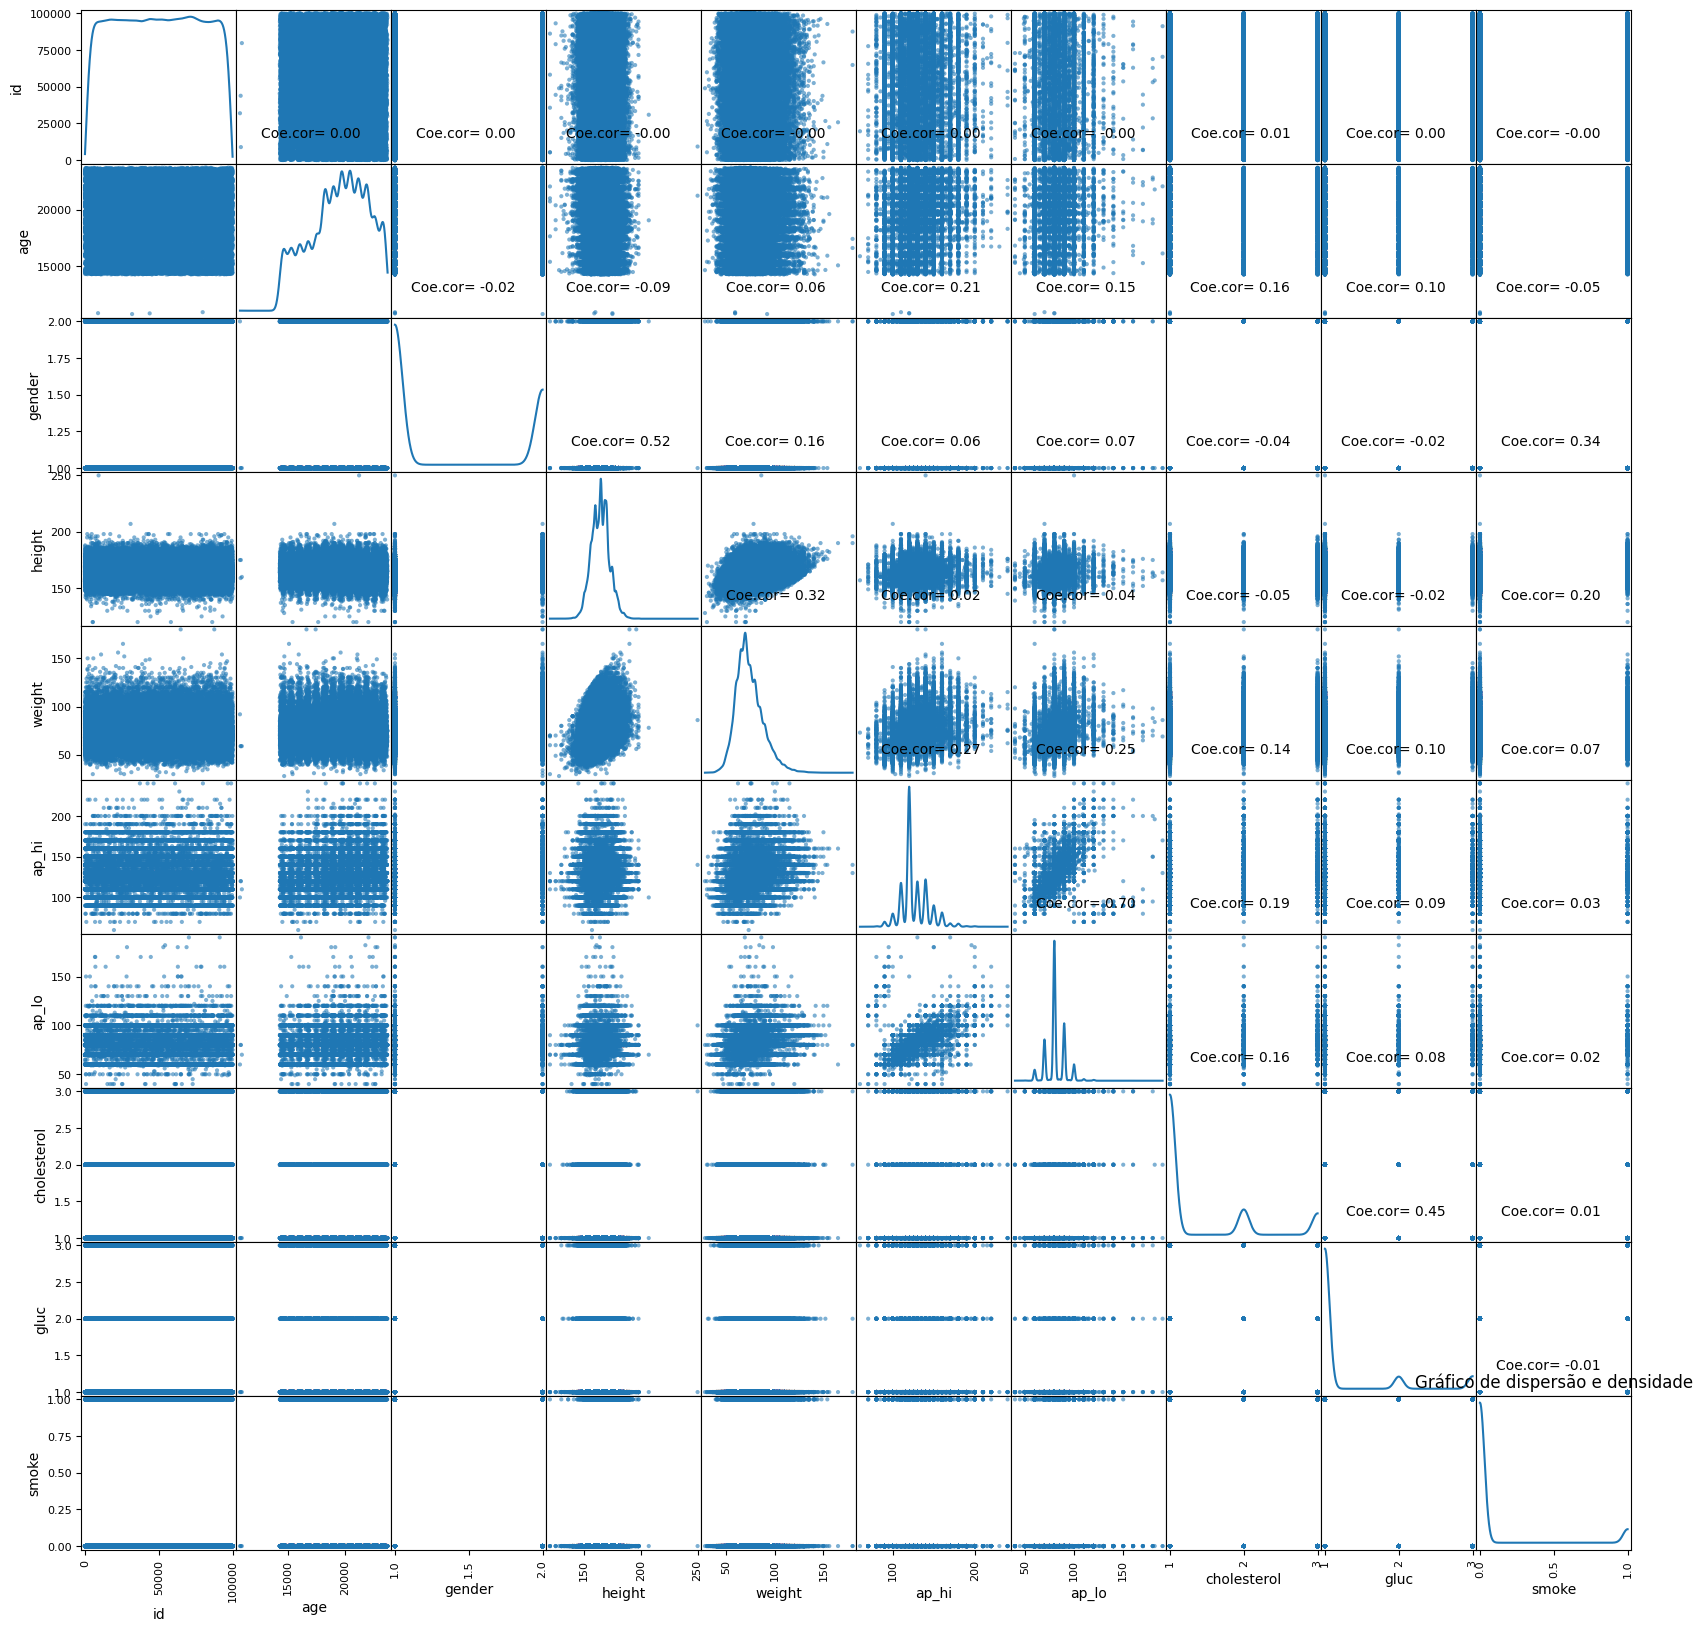

'Em resumo, esta linha de código permite percorrer eficientemente os elementos da matriz triangular superior de um array bidimensional, excluindo a diagonal principal e os elementos abaixo dela. Isso pode ser útil em muitos contextos, como ao calcular estatísticas ou operações em pares de elementos exclusivos.'

In [ ]:
# Correlação, nuvem na linear não tem relação, grafico pesado com pontos e nuvens
plotScatterMatrix(df_cardio, 20, 10)
'Em resumo, esta linha de código permite percorrer eficientemente os elementos da matriz triangular superior de um array bidimensional, excluindo a diagonal principal e os elementos abaixo dela. Isso pode ser útil em muitos contextos, como ao calcular estatísticas ou operações em pares de elementos exclusivos.'
#Relação Linear Reta crescente ou descresente imagem de Y =[ f(x) = ax + b]

#### *Explicando gráfico na matriz de dispersão*

##### **Diagonal *Principal***  \

Na matriz de dispersão, a *diagonal principal* é onde cada variável é plotada contra ela mesma. Em vez de mostrar um gráfico de dispersão, nessa posição é comum exibir um gráfico que represente a distribuição univariada dessa variável, como um histograma ou uma estimativa de densidade (KDE - Kernel Density Estimation).

A representação da distribuição univariada na diagonal principal é útil por várias razões:

###### **Auto-relacionamento:**
Mostra como cada variável se relaciona consigo mesma, o que não fornece muita informação no contexto de dispersão, mas pode destacar a distribuição da variável.

###### **Identificação de Distribuições:**
Permite visualizar facilmente a distribuição da variável, incluindo tendências como assimetria, multimodalidade e outras características importantes.

###### **Comparação Visual:**
Ao colocar os histogramas lado a lado na diagonal principal, é fácil comparar visualmente as distribuições de diferentes variáveis, destacando diferenças ou semelhanças.

Portanto, a diagonal principal na matriz de dispersão é reservada para visualizações que mostram a distribuição univariada de cada variável, fornecendo informações valiosas para análise exploratória de dados.

##### **Diagonal *Secundária***  /
Na matriz de dispersão, a diagonal secundária geralmente mostra o histograma (ou estimativas de densidade, como KDE - Kernel Density Estimation) de cada variável, em vez de um gráfico de dispersão. Isso é útil porque fornece uma visualização da distribuição univariada de cada variável no conjunto de dados.

Histogramas ou estimativas de densidade são úteis na diagonal secundária.

##### **Distribuição Univarida:**
Esses gráficos permitem examinar a distribuição de cada variável individualmente, o que pode ser útil para identificar padrões, assimetrias e outliers em cada variável.

##### **Comparação de Variáveis:**
Ao exibir os histogramas lado a lado na diagonal secundária, você pode comparar visualmente a distribuição de diferentes variáveis no conjunto de dados. Isso pode ajudar a identificar relações entre variáveis ou entender melhor a natureza dos dados.

##### **Identificação de Tendências:**
Você pode identificar tendências gerais nos dados, como distribuições normais, assimetrias ou multimodalidades, observando os histogramas na diagonal secundária.

Em resumo, os histogramas ou estimativas de densidade na diagonal secundária da matriz de dispersão são uma parte importante da análise exploratória de dados, pois fornecem informações sobre a distribuição univariada das variáveis no conjunto de dados.

# Machine Learning

## Cardio Categorias Y


In [ ]:
df_cardio["cardio"].head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

## Diferenciando bases

In [ ]:
df_cardio.loc[:, (df_cardio.columns != 'cardio') & (df_cardio.columns != 'id')].head()
# # Cardio X (não pega o que é cardiaco) e tambem ID descartado

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  
0     0       1  
1     0       1  
2     0       0  
3     0       1  
4     0       0

In [ ]:
Y = df_cardio["cardio"]  # Variavel para ser encontrada se é doença cardiaca ou nao
X = df_cardio.loc[:, (df_cardio.columns != 'cardio') & (df_cardio.columns != 'id')] # variavel de entrada do modelo

### Y Maiúsculo (apenas `cardio` e posição)

In [ ]:
Y.head() # Variavel para ser encontrada se é doença cardiaca ou nao CSV TOTAL apenas cardio

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [ ]:
Y.tail() # Variavel para ser encontrada se é doença cardiaca ou nao CSV TOTAL apenas cardio

69994    1
69995    0
69997    1
69998    1
69999    0
Name: cardio, dtype: int64

### X Maiúsculo (apenas conteúdo sem coluna `cardio`)

In [ ]:
X.head() # Variavel para ser encontrada se é doença cardiaca ou nao só o conteudo sem cardio

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  
0     0       1  
1     0       1  
2     0       0  
3     0       1  
4     0       0

In [ ]:
#!pip install -U scikit-learn
from sklearn.model_selection import train_test_split # biblioteca de machine learning https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Divisao dos dados em treino e teste - X de tamanho 34% e outro de 66% Y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.34, random_state=49) # garante que o resultado vai ser igual em outra maquina

### x TREINO minúsculo (apenas conteúdo sem coluna `cardio`)

In [ ]:
x_train.head() #conteudo sem cardio treino tamanho test_size=0.66

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
12917  21432       2     181    78.0    120     80            3     1      0   
41552  21337       1     165    64.0    130     80            3     3      0   
34746  19577       1     161    78.0    150     90            1     1      0   
53884  21173       1     168    78.0    120     80            1     1      0   
42950  22360       2     158    64.0    140     80            1     1      0   

       alco  active  
12917     0       1  
41552     0       1  
34746     1       1  
53884     0       1  
42950     0       1

In [ ]:
#train_test_split(X)

### y TREINO minúsculo (apenas coluna `cardio`)

In [ ]:
y_train.head() #conteudo apenas cardio test_size=0.66

12917    0
41552    1
34746    1
53884    0
42950    1
Name: cardio, dtype: int64

In [ ]:
#train_test_split(Y)

In [ ]:
x_test.head() #34% sem cardio

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
31721  19021       2     162    63.0    120     90            1     1      0   
51412  18198       1     169    65.0    110     70            1     1      0   
61381  20351       1     157    68.0    140     90            1     1      0   
54560  22706       1     165    65.0    100     60            1     1      0   
47758  19710       1     162    70.0    130     80            1     1      0   

       alco  active  
31721     0       1  
51412     0       1  
61381     0       1  
54560     0       1  
47758     0       1

In [ ]:
y_test.head() #34% apenas cardio

31721    0
51412    0
61381    1
54560    1
47758    0
Name: cardio, dtype: int64

### Divisão de treino e teste

In [ ]:
print(f"x_train_len: \t{len(x_train)}, {len(x_train)/len(X)*100}%")
print(f"x_test_len: \t{len(x_test)}, {len(x_test)/len(X)*100}%")
print(f"y_train_len: \t{len(y_train)}, {len(y_train)/len(X)*100}%")
print(f"y_test_len: \t{len(y_test)}, {len(y_test)/len(X)*100}%")

x_train_len: 	45233, 65.99985408915153%
x_test_len: 	23302, 34.000145910848474%
y_train_len: 	45233, 65.99985408915153%
y_test_len: 	23302, 34.000145910848474%


### Treinamento do modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ml_model = RandomForestClassifier(n_estimators=20, n_jobs=8, max_depth=4, verbose=1)
ml_model.fit(x_train, y_train)

#Fonte: https://medium.com/@jvsavietto6/machine-learning-m%C3%A9tricas-valida%C3%A7%C3%A3o-cruzada-bias-e-vari%C3%A2ncia-380513d97c95

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.4s finished


RandomForestClassifier(max_depth=4, n_estimators=20, n_jobs=8, verbose=1)

In [ ]:
"""
verbose=0: Sem saída durante o treinamento.
verbose=1: Saída mínima, fornecendo informações básicas sobre o processo de treinamento, como o progresso do treinamento e a conclusão.
verbose=2: Saída detalhada, fornecendo informações mais específicas sobre o processo de treinamento, como métricas sendo avaliadas e etapas internas do algoritmo.
"""

'\nverbose=0: Sem saída durante o treinamento.\nverbose=1: Saída mínima, fornecendo informações básicas sobre o processo de treinamento, como o progresso do treinamento e a conclusão.\nverbose=2: Saída detalhada, fornecendo informações mais específicas sobre o processo de treinamento, como métricas sendo avaliadas e etapas internas do algoritmo.\n'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ml_model = RandomForestClassifier(n_estimators=5, n_jobs=2, max_depth=3)
ml_model.fit(x_train, y_train)




RandomForestClassifier(max_depth=3, n_estimators=5, n_jobs=2)

In [ ]:
x_test.iloc[0].to_frame().transpose()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
31721  19021.0     2.0   162.0    63.0  120.0   90.0          1.0   1.0   

       smoke  alco  active  
31721    0.0   0.0     1.0

In [ ]:
ml_model.predict_proba(x_test.iloc[0].to_frame().transpose())[0][1] * 100

43.03366351759782

In [ ]:
# Suponha que x_test é um DataFrame com características de teste
# Suponha que ml_model é um modelo treinado de classificação

# Seleciona a primeira linha do x_test
first_sample = x_test.iloc[0]

# Converte a primeira linha para um DataFrame e transpõe
first_sample_df = first_sample.to_frame().transpose()

# Prediz as probabilidades para a primeira amostra
probabilities = ml_model.predict_proba(first_sample_df)

# Seleciona a probabilidade da classe positiva (classe 1)
positive_class_probability = probabilities[0][1]

# Converte a probabilidade em percentual
positive_class_percentage = positive_class_probability * 100

print(positive_class_percentage)


43.03366351759782


## Florestas aleatórias

A árvore de decisão mostrada no gráfico busca identificar a presença ou ausência de um problema cardíaco ("cardio") com base em várias características dos pacientes. Cada nível da árvore representa uma decisão baseada em uma característica específica. Vamos detalhar como essa busca é realizada:

***Nó Raiz:***

O nó raiz é o ponto inicial da árvore. Neste exemplo, a decisão inicial é baseada na variável "cholesterol". A condição pode ser algo como "cholesterol <= 1.5".
Divisões de Ramo:

A partir do nó raiz, a árvore se **_ramifica em dois nós filhos_**, dependendo de se a condição é verdadeira ou falsa.
Por exemplo, se "cholesterol <= 1.5" for verdadeiro, a árvore se move para o nó filho à esquerda. Se for falso, a árvore se move para o nó filho à direita.
Nó Interno:

Cada nó interno representa **_uma nova decisão baseada**_ em uma característica diferente. Por exemplo, um nó pode dividir os dados com base em "active <= 0.5" ou "ap_hi <= 132.5".
Esses nós internos continuam dividindo os dados em subconjuntos menores, cada um baseado em condições específicas.
Folhas:

As folhas da árvore representam as classificações finais. Cada folha contém uma previsão do modelo sobre se o paciente tem ou não a condição cardíaca.
Por exemplo, uma folha pode representar um grupo de pacientes com alto colesterol e baixa atividade física que têm uma alta probabilidade de ter a condição cardíaca.
Exemplo de Busca:

A árvore de decisão começa no nó raiz e verifica se o "cholesterol" do paciente é menor ou igual a 1.5.
Se sim, ela se move para o nó filho à esquerda e verifica a próxima característica, por exemplo, "active <= 0.5".
Se não, ela se move para o nó filho à direita e verifica outra característica, por exemplo, "ap_hi <= 132.5".
Esse processo continua até que a árvore atinja uma folha, onde uma decisão final é tomada sobre a presença ou ausência da condição cardíaca.
A árvore de decisão em uma ***Floresta Aleatória*** é apenas uma das muitas árvores que trabalham juntas para fazer previsões mais robustas e precisas. A visualização de uma árvore específica ajuda a entender como uma única árvore está contribuindo para o processo de decisão.

In [ ]:
predictions = ml_model.predict(x_test)

In [ ]:
predictions # quais seriam os cardios referentes em um vetorzão ... o modelo ele ACHA que é isso Não tem certeza

array([0, 0, 1, ..., 0, 1, 1])


# Precisão

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions) # y_test_VERDADEIRO, predictions- Calculado no ML (comparativo)
print(f'Precisão Acertos: {100*acc:.2f}%') # precisao de acertos
print(f'Erros Comparados: {100-100*acc:.2f}%') # precisao de erros

Precisão Acertos: 71.99%
Erros Comparados: 28.01%


In [ ]:
# test1 0.7575757575757576
# test2 0.8636363636363636
# Precisão Acertos: 72.17%
# Erros Comparados: 27.83%


# Visualização

In [ ]:
ml_model.estimators_[4]

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=467660997)

In [ ]:
ml_model.estimators_

# instâncias de vários tipos de árvores de decisão, como DecisionTreeClassifier para classificação
# ou DecisionTreeRegressor para regressão, e treiná-las com seus dados.

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=579069317),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2007853424),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=20099031),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1395215342),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=467660997)]

## Árvore de Decisão do Modelo de Floresta Aleatória

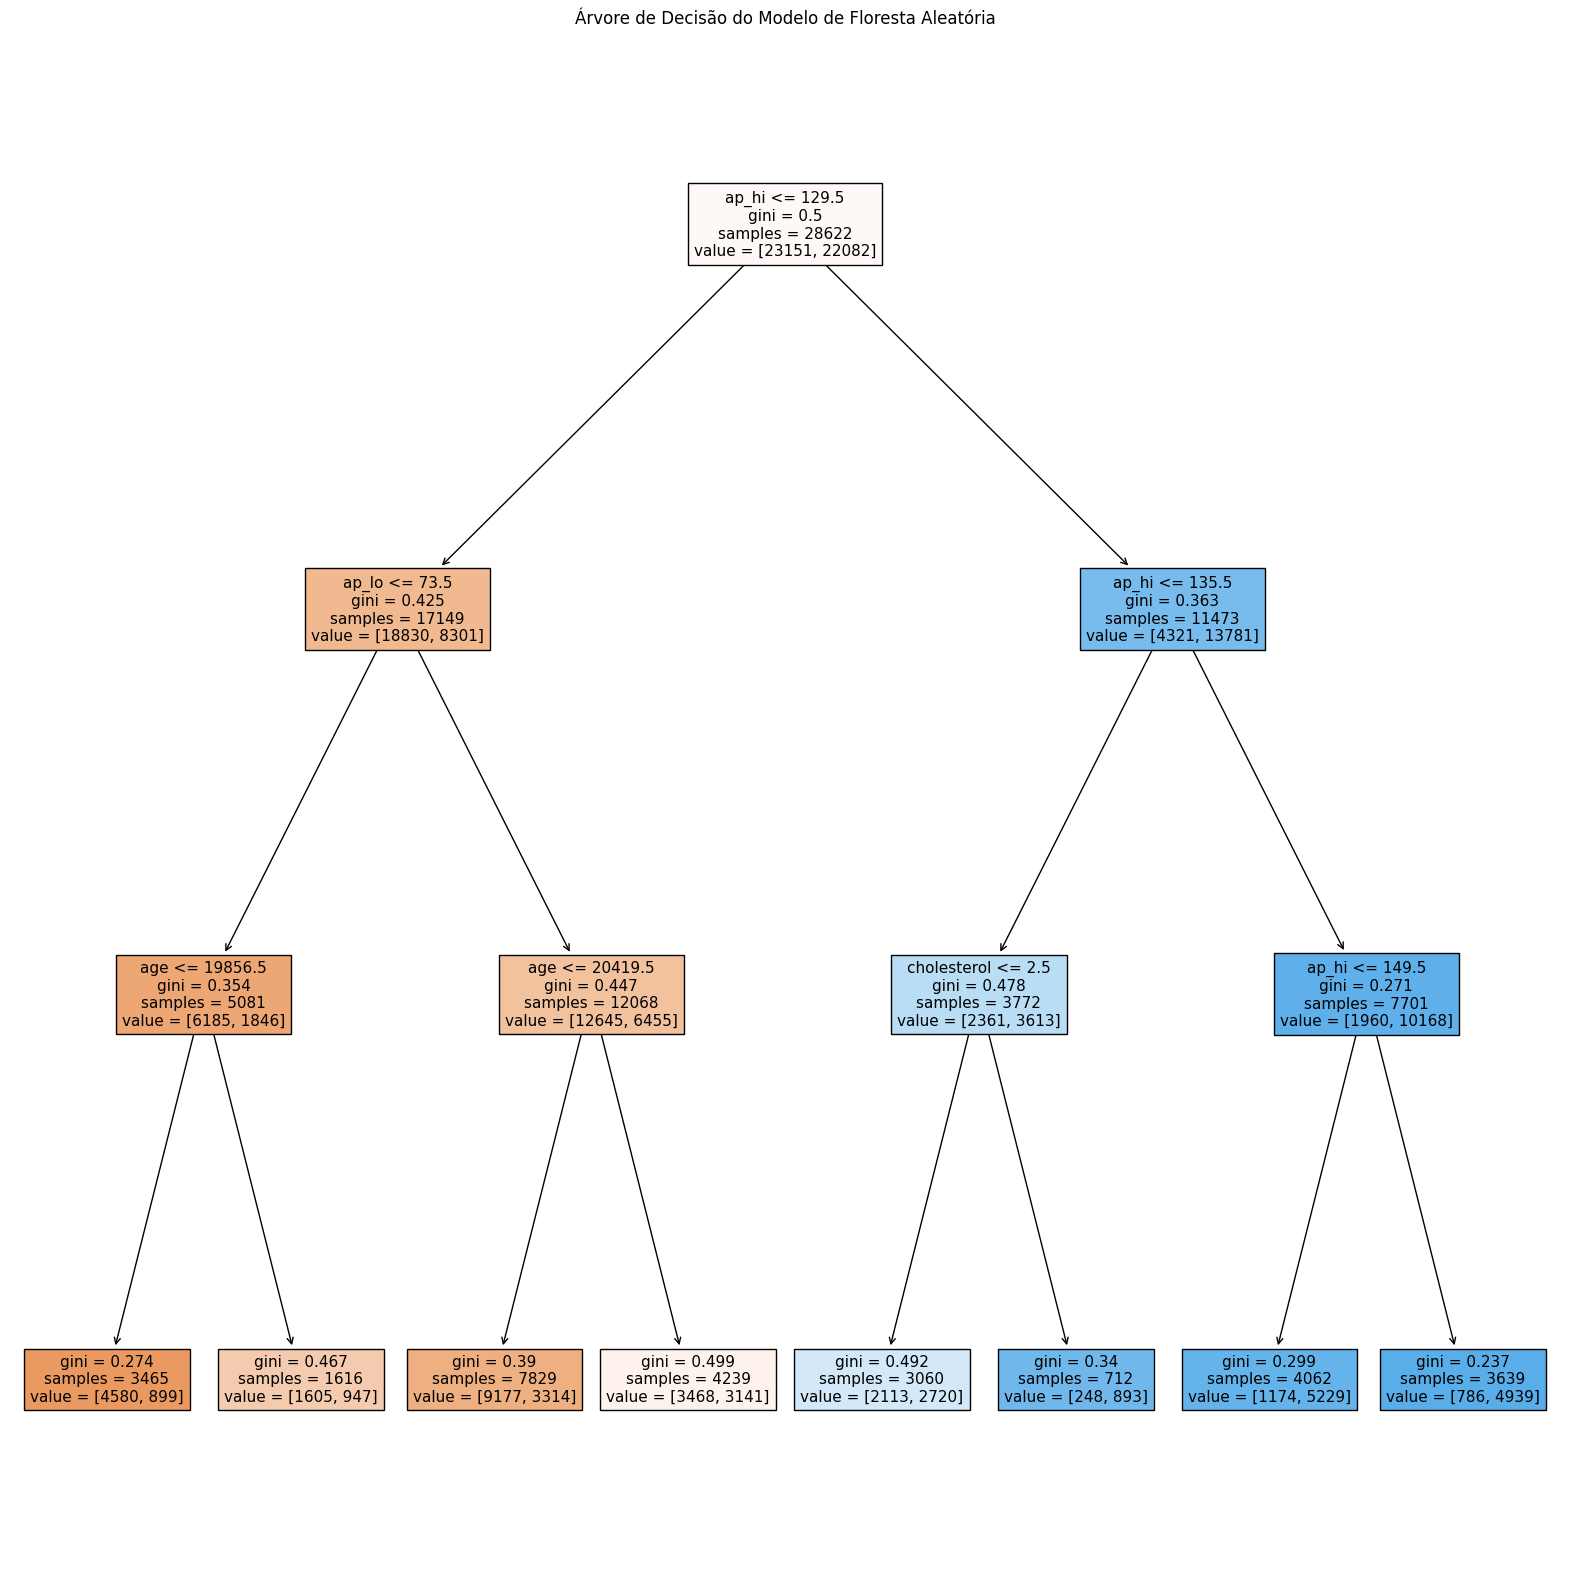

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(ml_model.estimators_[1], feature_names=X.columns, filled=True)
plt.title('Árvore de Decisão do Modelo de Floresta Aleatória')
plt.show()

#o que é GINI? https://stackoverflow.com/questions/39512260/calculating-gini-coefficient-in-python-numpy

In [ ]:
_

[Text(0.5, 0.875, 'ap_hi <= 129.5\ngini = 0.5\nsamples = 28622\nvalue = [23151, 22082]'),
 Text(0.25, 0.625, 'ap_lo <= 73.5\ngini = 0.425\nsamples = 17149\nvalue = [18830, 8301]'),
 Text(0.125, 0.375, 'age <= 19856.5\ngini = 0.354\nsamples = 5081\nvalue = [6185, 1846]'),
 Text(0.0625, 0.125, 'gini = 0.274\nsamples = 3465\nvalue = [4580, 899]'),
 Text(0.1875, 0.125, 'gini = 0.467\nsamples = 1616\nvalue = [1605, 947]'),
 Text(0.375, 0.375, 'age <= 20419.5\ngini = 0.447\nsamples = 12068\nvalue = [12645, 6455]'),
 Text(0.3125, 0.125, 'gini = 0.39\nsamples = 7829\nvalue = [9177, 3314]'),
 Text(0.4375, 0.125, 'gini = 0.499\nsamples = 4239\nvalue = [3468, 3141]'),
 Text(0.75, 0.625, 'ap_hi <= 135.5\ngini = 0.363\nsamples = 11473\nvalue = [4321, 13781]'),
 Text(0.625, 0.375, 'cholesterol <= 2.5\ngini = 0.478\nsamples = 3772\nvalue = [2361, 3613]'),
 Text(0.5625, 0.125, 'gini = 0.492\nsamples = 3060\nvalue = [2113, 2720]'),
 Text(0.6875, 0.125, 'gini = 0.34\nsamples = 712\nvalue = [248, 893]'),

### Tabela de Decisão da Árvore

| Nível | Decisão/Divisão                          | Condição                | Resultado se Verdadeiro              | Resultado se Falso                 |
|-------|------------------------------------------|-------------------------|--------------------------------------|------------------------------------|
| 0     | Nó Raiz                                   | `cholesterol <= 1.5`    | Move para o Nó 1 à Esquerda          | Move para o Nó 2 à Direita         |
| 1     | Nó Interno à Esquerda (Nó 1)              | `active <= 0.5`         | Move para o Nó 3 à Esquerda          | Move para o Nó 4 à Direita         |
| 1     | Nó Interno à Direita (Nó 2)               | `ap_hi <= 129.5`        | Move para o Nó 5 à Esquerda          | Move para o Nó 6 à Direita         |
| 2     | Nó Interno à Esquerda (Nó 3)              | `ap_hi <= 132.5`        | Move para o Nó 7 à Esquerda          | Move para o Nó 8 à Direita         |
| 2     | Nó Interno à Direita (Nó 4)               | `ap_hi <= 137.5`        | Move para o Nó 9 à Esquerda          | Move para o Nó 10 à Direita        |
| 2     | Nó Interno à Esquerda (Nó 5)              | `cholesterol <= 2.5`    | Move para o Nó 11 à Esquerda         | Move para o Nó 12 à Direita        |
| 2     | Nó Interno à Direita (Nó 6)               | `alco <= 0.5`           | Move para o Nó 13 à Esquerda         | Move para o Nó 14 à Direita        |
| 3     | Folha ou Nó Interno (Nó 7)                | -                       | Resultado de Classificação           | -                                  |
| 3     | Folha ou Nó Interno (Nó 8)                | -                       | Resultado de Classificação           | -                                  |
| 3     | Folha ou Nó Interno (Nó 9)                | -                       | Resultado de Classificação           | -                                  |
| 3     | Folha ou Nó Interno (Nó 10)               | -                       | Resultado de Classificação           | -                                  |
| 3     | Folha ou Nó Interno (Nó 11)               | -                       | Resultado de Classificação           | -                                  |
| 3     | Folha ou Nó Interno (Nó 12)               | -                       | Resultado de Classificação           | -                                  |
| 3     | Folha ou Nó Interno (Nó 13)               | -                       | Resultado de Classificação           | -                                  |
| 3     | Folha ou Nó Interno (Nó 14)               | -                       | Resultado de Classificação           | -                                  |

#### Detalhamento da classificação (binária) V ou F

- **Nó Raiz (Nível 0)**:
  - **Condição**: `cholesterol <= 1.5`
  - **Se Verdadeiro**: Move para o nó à esquerda (Nível 1, Nó 1)
  - **Se Falso**: Move para o nó à direita (Nível 1, Nó 2)
|
- **Nível 1 - Nó Interno à Esquerda (Nó 1)**:
  - **Condição**: `active <= 0.5`
  - **Se Verdadeiro**: Move para o nó à esquerda (Nível 2, Nó 3)
  - **Se Falso**: Move para o nó à direita (Nível 2, Nó 4)
|
- **Nível 1 - Nó Interno à Direita (Nó 2)**:
  - **Condição**: `ap_hi <= 129.5`
  - **Se Verdadeiro**: Move para o nó à esquerda (Nível 2, Nó 5)
  - **Se Falso**: Move para o nó à direita (Nível 2, Nó 6)
|
- **Nível 2 - Nó Interno à Esquerda (Nó 3)**:
  - **Condição**: `ap_hi <= 132.5`
  - **Se Verdadeiro**: Move para o nó à esquerda (Nível 3, Nó 7)
  - **Se Falso**: Move para o nó à direita (Nível 3, Nó 8)
|
- **Nível 2 - Nó Interno à Direita (Nó 4)**:
  - **Condição**: `ap_hi <= 137.5`
  - **Se Verdadeiro**: Move para o nó à esquerda (Nível 3, Nó 9)
  - **Se Falso**: Move para o nó à direita (Nível 3, Nó 10)
|
- **Nível 2 - Nó Interno à Esquerda (Nó 5)**:
  - **Condição**: `cholesterol <= 2.5`
  - **Se Verdadeiro**: Move para o nó à esquerda (Nível 3, Nó 11)
  - **Se Falso**: Move para o nó à direita (Nível 3, Nó 12)
|
- **Nível 2 - Nó Interno à Direita (Nó 6)**:
  - **Condição**: `alco <= 0.5`
  - **Se Verdadeiro**: Move para o nó à esquerda (Nível 3, Nó 13)
  - **Se Falso**: Move para o nó à direita (Nível 3, Nó 14)
|
- **Nível 3**:
  - **Nó 7, 8, 9, 10, 11, 12, 13, 14**:
    - Esses nós podem ser folhas ou nós internos adicionais que fazem classificações finais sobre a presença de um problema cardíaco com base nas características restantes.

### Avaliação do modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74     11707
           1       0.76      0.64      0.70     11595

    accuracy                           0.72     23302
   macro avg       0.73      0.72      0.72     23302
weighted avg       0.72      0.72      0.72     23302

[[9329 2378]
 [4149 7446]]


***Precisão:*** Proporção de verdadeiros positivos sobre todos os exemplos previstos como pertencentes àquela classe.

***Recall:*** Proporção de verdadeiros positivos sobre todos os exemplos que realmente pertencem àquela classe.

***F1-Score:*** Média harmônica entre precisão e recall. Uma métrica que combina precisão e recall em um único número, útil quando as classes estão desequilibradas.

***Suporte:*** O número de ocorrências de cada classe no conjunto de dados de teste.

Na _classe 0_, a precisão é de 69%, o recall é de 80% e o F1-Score é de 74%. Há N `cardio zero 0` ocorrências dessa classe no conjunto de teste.

Na _classe 1_, a precisão é de 75%, o recall é de 63% e o F1-Score é de 68%. Há N `cardio um 1`ocorrências dessa classe no conjunto de teste.

### Importâncias de permutação (conjunto de testes)

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(ml_model, x_test, y_test, n_repeats=10, n_jobs=2)
sorted_idx = result.importances_mean.argsort()


#### Gráfico (conjunto de testes)

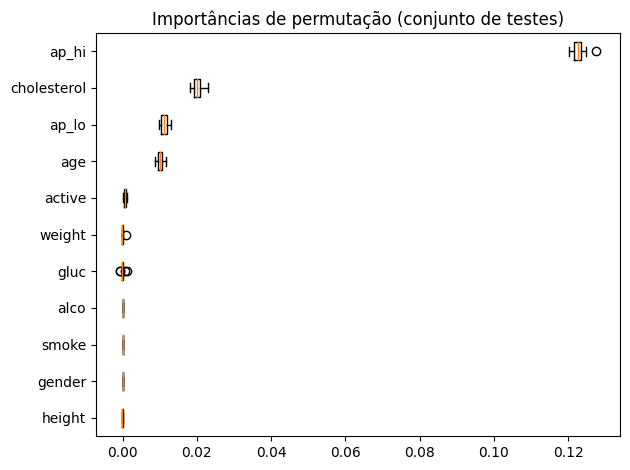

In [ ]:
# Desenha um boxplot horizontal das importâncias de permutação.
# Um boxplot é um tipo de gráfico que mostra a distribuição estatística dos dados em uma maneira que permite comparar várias características de uma vez.
# As caixas mostram onde estão a maior parte dos dados e as linhas no interior delas representam os quartis dos dados.
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=x_test.columns[sorted_idx])
ax.set_title("Importâncias de permutação (conjunto de testes)")
fig.tight_layout()
plt.show()

# Pessoas para teste de experimento

In [ ]:
def predicao(X, Y, num, model):
    pos = num
    print("x teste: \n", X.iloc[pos].T)
    print("y teste: \n", Y.iloc[pos].T)

    # Garantir que a entrada de previsão tenha os mesmos nomes de features
    prediction_input = X.iloc[pos].to_frame().T

    predictions = model.predict(prediction_input)
    print("y prediction: \n", predictions)

#### Teste 1 | Treino 1 (identificou ***cárdio*** corretamente)

In [ ]:
predicao(x_test,y_test,777,ml_model)

x teste: 
 age            17537.0
gender             1.0
height           164.0
weight           105.0
ap_hi            130.0
ap_lo             80.0
cholesterol        2.0
gluc               1.0
smoke              0.0
alco               0.0
active             0.0
Name: 20344, dtype: float64
y teste: 
 1
y prediction: 
 [1]


#### Teste 1 | Treino 0 (identificou ***não-cárdio*** incorretamente)

In [ ]:
predicao(x_test,y_test,3,ml_model)

x teste: 
 age            22706.0
gender             1.0
height           165.0
weight            65.0
ap_hi            100.0
ap_lo             60.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
Name: 54560, dtype: float64
y teste: 
 1
y prediction: 
 [0]


#### Teste 0 | Treino 1 (identificou ***cárdio*** incorretamente)

In [ ]:
predicao(x_test,y_test,659,ml_model)

x teste: 
 age            22830.0
gender             1.0
height           162.0
weight            65.0
ap_hi            155.0
ap_lo             91.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
Name: 41568, dtype: float64
y teste: 
 1
y prediction: 
 [1]


#### Teste 0 | Treino 0 (identificou ***não-cárdio*** corretamente)

In [ ]:
predicao(x_test,y_test,1,ml_model)

x teste: 
 age            18198.0
gender             1.0
height           169.0
weight            65.0
ap_hi            110.0
ap_lo             70.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
Name: 51412, dtype: float64
y teste: 
 0
y prediction: 
 [0]


In [ ]:
x_test.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

Usa print(df_cardio.columns) para verificar se a coluna cardio está presente no DataFrame.
Definição da Variável Alvo:

Define target_column como cardio.
Divisão dos Dados:

Divide o DataFrame em features (X) e target (y) utilizando cardio como a variável alvo.
Divide os dados em treino e teste.
Treinamento e Previsão:

Treina um modelo RandomForestClassifier usando os dados de treino.
Faz previsões no conjunto de teste.
Avaliação do Modelo:

Avalia o desempenho do modelo utilizando classification_report e confusion_matrix.
Importância das Features:

Calcula a importância das features utilizando permutation_importance e plota os resultados.
Valores SHAP:

Gera os valores SHAP utilizando TreeExplainer do modelo treinado.
Plota os valores SHAP para as features do conjunto de teste.
Notas Adicionais:
Certifique-se de que todas as bibliotecas necessárias estejam instaladas (pandas, numpy, matplotlib, sklearn, shap).
Ajuste o nome da variável alvo (target_column) conforme necessário.
Verifique se os dados do DataFrame df_cardio estão carregados corretamente antes de executar o código.

# Redução de Base

In [ ]:
# Comando seleciona as últimas 30.000 linhas do DataFrame
df_cardio_comp = df_cardio[-30000:]

In [ ]:
# Exceto as últimas 30.000 do Dataframe
df_cardio_comp2 = df_cardio[:-30000]

# Fontes pesquisadas (Bibliografia de pesquisas)

| Tópico Pesquisado                                        | Descrição                                                         | Link                                                                                                                                        |
|-----------------------------------------------|-------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
|<font size="+1">***Machine Learning***</font>                          |                                                                   |                                                                                                                                             |
| **Árvore de Decisão**                         | Blog Somostera: Entenda o algoritmo de Árvore de Decisão         | [Blog Somostera](https://blog.somostera.com/data-science/arvores-de-decisao#:~:text=No%20contexto%20de%20machine%20learning,que%20ser%C3%A1%20gerado%20como%20resposta.)                   |
| **Random Forest**                         | Blog Somostera: Para que serve esse algoritmo em machine learning?        | [Blog Somostera](https://blog.somostera.com/data-science/arvores-de-decisao#:~:text=No%20contexto%20de%20machine%20learning,que%20ser%C3%A1%20gerado%20como%20resposta.)                   |
| **Nós-Folha (Leaf Nodes) + nó-raiz (root node)**                         | Blog Somostera: Entenda o algoritmo de Árvore de Decisão         | [Blog Somostera](https://blog.somostera.com/data-science/arvores-de-decisao#:~:text=No%20contexto%20de%20machine%20learning,que%20ser%C3%A1%20gerado%20como%20resposta.)                   |
| **Métricas para Classificação**               | Medium: Métricas para avaliar modelos de classificação            | [Medium](https://medium.com/@jvsavietto6/machine-learning-m%C3%A9tricas-valida%C3%A7%C3%A3o-cruzada-bias-e-vari%C3%A2ncia-380513d97c95) |
| **Plotagem Gráfica Avançada entre Termos**    | Graphviz: Ferramenta para plotar gráficos avançados              | [Graphviz](https://graphviz.org/)                                                                                             |
| **MLPClassifier para Classificação Binária**  | Michael Fuchs Python: Implementação do MLPClassifier em Python    | [Michael Fuchs Python](https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/) |
| **Mais sobre MLP no scikit-learn**            | Documentação do scikit-learn sobre MLPClassifier                 | [scikit-learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)               |
| **Validação cruzada (k-fold) e Hold-out**     | Medium: Como realizar validação cruzada e hold-out               | [Medium](https://medium.com/@jvsavietto6/machine-learning-m%C3%A9tricas-valida%C3%A7%C3%A3o-cruzada-bias-e-vari%C3%A2ncia-380513d97c95)                                                               |
|-                                |                                                                   |                                                                                                                                             |
| <font size="+1">***Redes Neurais***</font>                                |                                                                   |                                                                                                                                             |
| **Bias e variância**                          | Medium: Compreendendo bias e variância em modelos de ML          | [Medium](https://medium.com/@jvsavietto6/machine-learning-m%C3%A9tricas-valida%C3%A7%C3%A3o-cruzada-bias-e-vari%C3%A2ncia-380513d97c95)                                                        |
| **Overfitting e underfitting**                | Medium: Entendendo overfitting e underfitting                    | [Medium](https://medium.com/@jvsavietto6/machine-learning-m%C3%A9tricas-valida%C3%A7%C3%A3o-cruzada-bias-e-vari%C3%A2ncia-380513d97c95)                                        |
| **Alguns exemplos de apoio em Python**        | Documentação do scikit-learn com exemplos de MLPClassifier       | [scikit-learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)                                        |
| **Loading the data**                          | Documentação do scikit-learn com exemplos de MLPClassifier       | [scikit-learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) |
| **Implementando a Rede Neural Perceptron com Python - PyImageSearch** | Implementação do MLPClassifier em Python - Michael Fuchs Python | [Michael Fuchs Python](https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/)                                         |
| **Calculando o Coeficiente Gini em Python/numpy - Stack Overflow** | Stack Overflow: Como calcular o coeficiente Gini em Python/numpy | [Stack Overflow](https://stackoverflow.com/questions/39512260/calculating-gini-coefficient-in-python-numpy)                                                                                   |
|-                               |                                                                   |                                                                                                                                             |
| <font size="+1">***Outros Tópicos***</font>                                |                                                                   |                                                                                                                                             |
| **Mapa interativo muito simples em Python usando a biblioteca Folium - Medium** | Medium: Tutorial de como criar um mapa interativo usando Folium | [Medium](https://medium.com/@eudson.santos/mapa-interativo-muito-simples-usando-folium-67ebc775e75a)                                                                         |
| **scikit-learn: aprendizado de máquina em Python — documentação do scikit-learn 1.5.0** | Documentação do scikit-learn                                   | [scikit-learn Documentation](https://scikit-learn.org/stable/index.html)                                                                                               |
| **Como suprimir o aviso Future do Pandas? - Stack Overflow** | Stack Overflow: Como suprimir o aviso Future do Pandas?         | [Stack Overflow](https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning)                                                                   |
| **ImportError: No module named model_selection - Stack Overflow** | Stack Overflow: ImportError: No módulo chamado model_selection | [Stack Overflow](https://stackoverflow.com/questions/40704484/importerror-no-module-named-model-selection)                                                           |
| **Download do PDF - Use A Cabeça! Python-pt (alta Book)** | Download do livro Use A Cabeça! Python-pt (alta Book)          | [Download PDF](https://doku.pub/download/use-a-cabea-python-pt-alta-bookpdf-6lkvm5m4px04)                                                                             |
| **Mais Ferramentas de Fluxo de Controle — documentação do Python 3.12.3** | Documentação do Python 3.12.3: Mais ferramentas de controle de fluxo | [Python 3.12.3 Documentation](https://docs.python.org/3/tutorial/controlflow.html)                                                                                     |
| **pandas - Biblioteca de Análise de Dados em Python** | Documentação do pandas                                           | [pandas Documentation](https://pandas.pydata.org/getting_started.html)                                                                                                  |
| **Bem-vindo ao Python.org**                    | Site oficial do Python.org                                       | [Python.org](https://www.python.org/)                                                                                                                                  |
| **Exemplo de Switch Statement em Python — FreeCodeCamp** | Exemplo de uso de Switch Statement em Python              | [FreeCodeCamp](https://www.freecodecamp.org/news/python-switch-statement-switch-case-example/)                                                                         |
|-                               |                                                                   |                                                                                                                                             |
| <font size="+1">***Demais em contexto***</font>                                |                                                                   |                                                                                                                                             |
| ***Sístole e diástole: passo a passo para entender o ciclo cardíaco*** |       Referências | [SanarMed](https://sanarmed.com/sistole-e-diastole-passo-a-passo-para-entender-o-ciclo-cardiaco-projetoq2-2022/)                                                                         |
| ***Sístole e diástole: passo a passo para entender o ciclo cardíaco*** |       Diagrama de Wiggers & Pressão aórtica | [KenHub](https://www.kenhub.com/pt/library/anatomia/ciclo-cardiaco)                                                                         |
SILVERTHORN DU. Fisiologia humana: Uma abordagem integrada. 7ª ed. Porto Alegre: Ed. Artmed, 2017. (Cap 14)
GUYTON, A.C. E HALL, J.E. Tratado de fisiologia médica. 11ª edição. Rio de Janeiro: Elsevier, 2006.        |
| ***O que é Multicolinearidade, como identificar e como lidar?*** |    A multicolinearidade é um problema que pode comprometer a interpretação dos resultados de modelos de regressão | [PsicoMetria](https://www.blog.psicometriaonline.com.br/o-que-e-multicolinearidade/#:~:text=A%20multicolinearidade%20%C3%A9%20uma%20situa%C3%A7%C3%A3o,dificultar%20a%20interpreta%C3%A7%C3%A3o%20dos%20resultados.)                                                                         |
| ***Valor do fator de inflação da variância (VIF)*** |  Basta! Lidando com a multicolinearidade na análise de regressão  | [MiniTab](https://blog.minitab.com/pt/basta-lidando-com-a-multicolinearidade-na-analise-de-regressao)                                                                         |
'https://github.com/martisak/dotnets'
'https://www.youtube.com/watch?v=jBGxiu8K11o'

Método Utilizado
---

Reforço (ou "ensemble") é uma técnica em aprendizado de máquina que combina vários modelos de forma a melhorar o desempenho geral do sistema. Aqui estão alguns métodos comuns de reforço em aprendizado de máquina:
______
```Random Forest:``` Um método de aprendizado de máquina baseado em árvores de decisão, onde várias árvores de decisão são treinadas em subconjuntos aleatórios dos dados e suas previsões são combinadas para produzir uma previsão final.
______
***Gradient Boosting***: Um método que constrói um modelo de previsão em forma de árvore de decisão em estágios sequenciais. Cada árvore tenta corrigir os erros cometidos pelo modelo anterior.
______
***AdaBoost***: Um algoritmo de reforço adaptativo que ajusta os pesos das instâncias de treinamento, dando mais peso às instâncias que são difíceis de classificar.
______
***XGBoost (Extreme Gradient Boosting)***: Uma implementação eficiente em termos computacionais do algoritmo de gradient boosting que apresenta um desempenho superior e velocidade de treinamento em comparação com outras implementações de gradient boosting.
______
***CatBoost***: Uma biblioteca de gradient boosting com suporte para dados categóricos, que lida automaticamente com variáveis categóricas sem necessidade de pré-processamento.
______
Esses são apenas alguns exemplos de métodos de reforço em aprendizado de máquina. Cada método tem suas próprias características e é mais adequado para diferentes tipos de problemas e conjuntos de dados. Ao combinar vários modelos de reforço, é possível obter melhorias significativas no desempenho do modelo.

# Conclusões

## Resumindo

Analisando os dados de saúde para determinar se as pessoas têm uma condição cardiovascular, chamada "cardio", ou não, inicialmente, a precisão geral do modelo foi de 71%. Após a inclusão da variável de IMC (Índice de Massa Corporal), essa precisão aumentou para 72%. Isso significa que o modelo acertou em suas previsões em cerca de 72% das vezes.

A precisão na identificação das pessoas que realmente não tinham a condição ("cardio" = 0) inicialmente foi de 69%, e após a inclusão da variável de IMC, aumentou para 73%. Isso indica que, em cada 100 pessoas que realmente não tinham a condição, o modelo corretamente identificou aproximadamente 73 delas como não tendo a condição.

Já a precisão na identificação das pessoas que realmente tinham a condição ("cardio" = 1) inicialmente foi de 73%, e após a inclusão da variável de IMC, diminuiu para 68%. Isso significa que, em cada 100 pessoas que tinham a condição, o modelo corretamente identificou cerca de 68 delas como tendo a condição.

No entanto, o modelo ainda cometeu alguns erros:

Classificou incorretamente cerca de 27 em cada 100 pessoas que realmente não tinham a condição como tendo a condição.
Da mesma forma, classificou incorretamente cerca de 32 em cada 100 pessoas que realmente tinham a condição como não tendo a condição.
Portanto, embora o modelo tenha mostrado habilidade em suas previsões, ainda há espaço para melhorias visando reduzir esses erros de classificação.

Ao usar o algoritmo Random Forest (ou qualquer outro algoritmo de aprendizado de máquina), a presença de linhas duplicadas nos dados pode ter algumas consequências:

***Influência nos resultados estatísticos:*** Dados duplicados podem aumentar artificialmente a importância de certos padrões nos dados, distorcendo as estatísticas e os resultados do modelo.

***Viés no modelo:*** Se o conjunto de dados contiver muitas linhas duplicadas, o modelo pode ficar enviesado para esses padrões duplicados, levando a previsões menos precisas e gerais.

***Redundância de informações:*** Linhas duplicadas não adicionam informações novas ou úteis ao modelo. Pelo contrário, elas apenas ocupam espaço e podem aumentar o tempo de processamento sem benefício adicional.

Portanto, é uma prática comum e recomendada remover linhas duplicadas do conjunto de dados antes de treinar um modelo de aprendizado de máquina, incluindo o Random Forest. Isso ajuda a garantir a integridade dos dados e a evitar que o modelo seja influenciado por redundâncias, o que poderia distorcer seus resultados.

------
***Remoção de colunas com valores ausentes:*** A primeira linha, df = df.dropna(axis=1), remove todas as colunas que contêm valores ausentes (NaN) do DataFrame df. Isso ajuda a garantir que o cálculo da matriz de correlação não seja afetado por valores ausentes, que podem distorcer as correlações entre as variáveis.

***Remoção de colunas constantes:*** A segunda linha, df = df[[col for col in df if df[col].nunique() > 1]], remove todas as colunas que têm apenas um único valor único, ou seja, colunas que são constantes. Isso é feito verificando se o número de valores únicos em cada coluna (df[col].nunique()) é maior que 1. Colunas constantes não contribuem para a análise de correlação, pois não há variação nos dados, então elas são removidas para simplificar a matriz de correlação.

Essas etapas de limpeza de dados ajudam a garantir que a matriz de correlação seja calculada com precisão e que as correlações entre as variáveis sejam representativas do conjunto de dados sem introduzir distorções devido a valores ausentes ou colunas constantes.

-----

A preparação de dados para machine learning é uma parte crucial do processo de construção de modelos eficazes. Aqui estão algumas fases típicas:

***Aquisição de Dados:*** Isso envolve coletar os dados necessários para o seu projeto de machine learning. Os dados podem vir de várias fontes, como bancos de dados, APIs, arquivos CSV, etc.

***Limpeza de Dados:*** Nesta fase, você precisa lidar com dados ausentes, inconsistentes ou incorretos. Isso pode incluir preencher valores ausentes, remover duplicatas, corrigir erros de digitação e lidar com outliers.

***Pré-processamento:*** Isso envolve a transformação dos dados em um formato adequado para modelagem. Isso pode incluir normalização de dados, codificação de variáveis categóricas, dimensionamento de recursos e seleção de características.

***Engenharia de Recursos:*** Às vezes, os recursos existentes podem não ser suficientes para capturar toda a informação relevante nos dados. Nesta fase, você pode criar novos recursos com base nos existentes para melhorar o desempenho do modelo.

***Divisão de Dados:*** Antes de treinar um modelo, é importante dividir os dados em conjuntos de treinamento, validação e teste. O conjunto de treinamento é usado para treinar o modelo, o conjunto de validação é usado para ajustar os hiperparâmetros do modelo e o conjunto de teste é usado para avaliar o desempenho final do modelo.

***Transformação de Dados:*** Dependendo do algoritmo de machine learning que você está usando, pode ser necessário transformar os dados de uma maneira específica. Por exemplo, transformar os dados para que sigam uma distribuição normal, aplicar redução de dimensionalidade, entre outras técnicas.

***Validação de Dados:*** Durante o treinamento do modelo, é importante validar os resultados para garantir que o modelo esteja se comportando conforme o esperado. Isso pode envolver o uso de validação cruzada ou outras técnicas de validação.

***Iteração:*** O processo de preparação de dados muitas vezes envolve várias iterações. Você pode descobrir que precisa retornar a uma etapa anterior e ajustar os dados ou experimentar diferentes técnicas para obter os melhores resultados.

-----
***Curiosidades***

Se os irmãos gêmeos fossem incluídos no conjunto de dados e fossem idênticos em todas as características (idade, gênero, altura, peso, pressão arterial, etc.), exceto no resultado de ter ou não problemas cardíacos, isso representaria uma situação de linhas duplicadas. No entanto, se um dos irmãos desenvolveu um problema cardíaco e o outro não, isso significaria que há uma diferença na variável de destino (target) entre esses registros duplicados.

Nesse caso, a remoção de linhas duplicadas ainda seria uma prática recomendada, pois o objetivo é treinar um modelo de aprendizado de máquina para prever se uma pessoa terá ou não problemas cardíacos com base em suas características. Ter múltiplas entradas idênticas com resultados diferentes pode confundir o modelo e prejudicar sua capacidade de fazer previsões precisas.

Portanto, mesmo que os irmãos gêmeos tenham características muito semelhantes, a presença de resultados diferentes para a mesma configuração de características ainda justificaria a remoção das linhas duplicadas antes de treinar o modelo. Isso garantiria que o modelo seja treinado com dados limpos e sem ambiguidades.



***Condições normais de pressão***

Pressão sistólica (ap_hi): Menos de 120 mmHg.
Pressão diastólica (ap_lo): Menos de 80 mmHg.

A pressão arterial é medida em duas leituras principais: a pressão sistólica (o número superior) e a pressão diastólica (o número inferior). A pressão sistólica mede a pressão nas artérias quando o coração bate, enquanto a pressão diastólica mede a pressão nas artérias entre os batimentos cardíacos, quando o coração está em repouso.

***Pressão Sistólica***

*Mínima:* Pressões sistólicas extremamente baixas, como menos de 70 mmHg, podem ocorrer em situações de choque ou insuficiência cardíaca grave.
*Máxima:* A pressão sistólica pode chegar a níveis extremamente altos em casos de hipertensão grave. Recordes de pressão sistólica podem ultrapassar 300 mmHg, embora tais níveis sejam perigosamente altos e possam levar a sérias complicações médicas, incluindo acidentes vasculares cerebrais e ataques cardíacos.

***Pressão Diastólica***

*Mínima:* Pressões diastólicas extremamente baixas, abaixo de 40 mmHg, podem ser observadas em casos de choque, hemorragia severa ou outras condições médicas graves.
*Máxima:* Pressões diastólicas podem alcançar níveis perigosamente altos, como acima de 140 mmHg, em casos de hipertensão grave e crises hipertensivas. Valores tão altos são raros e indicam uma necessidade urgente de intervenção médica.

***Recordes Médicos***

*Recordes de Pressão Alta:* A pressão arterial recorde foi registrada em alguns casos extremos de crise hipertensiva, mas não há uma "pressão arterial mais alta" oficialmente reconhecida como um recorde mundial devido à variabilidade das condições médicas e à gravidade dos casos.

*Recordes de Pressão Baixa:* Da mesma forma, pressões arteriais extremamente baixas ocorrem em condições clínicas graves e não são registradas como recordes devido à sua associação com emergências médicas e situações de risco de vida.

| Fonte | Link |
|-------|------|
| American Heart Association - Blood Pressure | [AHA](https://www.heart.org/en/health-topics/high-blood-pressure/the-facts-about-high-blood-pressure/understanding-blood-pressure-readings) |
| National Heart, Lung, and Blood Institute - What Is Blood Pressure? | [NHL](https://www.nhlbi.nih.gov/health-topics/high-blood-pressure) |
| Centers for Disease Control and Prevention - High Blood Pressure | [CDC](https://www.cdc.gov/bloodpressure/about.htm) |


# Multicolinearidade

## Matriz de Correlação

A matriz de correlação exibe as correlações de Pearson entre todas as variáveis independentes no modelo. Correlações altas (acima de 0,70) entre pares de variáveis indicam uma forte correlação linear, o que pode ser um sinal de multicolinearidade. Correlações acima de 0,80 são ainda mais preocupantes, pois sugerem uma relação quase perfeita.

### Exemplo de Matriz de Correlação

|     | X1  | X2  | X3  |
|-----|-----|-----|-----|
| **X1** | 1.0 | 0.85| 0.65|
| **X2** | 0.85| 1.0 | 0.80|
| **X3** | 0.65| 0.80| 1.0 |

No exemplo acima, as variáveis **X1** e **X2** têm uma correlação de **0.85**, indicando uma possível multicolinearidade.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 'from ... import ...' é uma declaração usada para importar partes específicas de um módulo ou pacote.
# Aqui, estamos importando a função 'variance_inflation_factor' do submódulo 'outliers_influence' que está dentro do módulo 'statsmodels.stats'.
#
# O módulo 'statsmodels' é uma biblioteca em Python que fornece classes e funções para a estimativa de muitos modelos estatísticos diferentes,
# assim como a realização de testes estatísticos e a exploração de dados.
#
# O submódulo 'outliers_influence' contém ferramentas para medir a influência de pontos atípicos (outliers) em modelos estatísticos.
#
# A função 'variance_inflation_factor' (comumente abreviada como VIF) é usada para detectar a presença de multicolinearidade entre as variáveis independentes de um modelo de regressão.
# Multicolinearidade é uma situação em que duas ou mais variáveis independentes em um modelo de regressão estão altamente correlacionadas, o que pode distorcer os resultados do modelo.


In [ ]:
#import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exemplo de DataFrame (substitua com seus dados)
df = df_cardio

print("Dados carregados:\n", df)

# Calcular a matriz de correlação
correlation_matrix = df.corr()
print("\nMatriz de Correlação:\n", correlation_matrix)

# Calcular o VIF para cada variável
X = df[['height', 'weight', 'bmi']]
vif_data = pd.DataFrame()
vif_data['Variável'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nValores VIF:\n", vif_data)


Dados carregados:
           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69994  99992  21074       1     165    80.0    150     80            1     1   
69995  99993  19240       2     168    76.0    120     80            1     1   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  

### Fator de Inflação da Variância (VIF)

O VIF (Fator de Inflação da Variância) mede o quanto a variância de um coeficiente de regressão é inflada devido à multicolinearidade. Um VIF é calculado para cada variável independente. Valores de VIF são interpretados da seguinte forma:

- **VIF > 10**: Indica alta multicolinearidade.
- **5 < VIF ≤ 10**: Pode ser preocupante, dependendo do contexto.
- **VIF ≤ 5**: Geralmente aceitável.

Para calcular o VIF, você pode usar a fórmula:

$${VIF}(X_i) = \frac{1}{1 - R_i^2}$$


Onde \( $R_i^2$ \) é o coeficiente de determinação da regressão da variável \( $X_i$ \) contra todas as outras variáveis independentes.


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Suponha que temos um DataFrame com variáveis independentes
data = df_cardio

# Adiciona uma constante ao DataFrame (necessário para calcular o VIF)
data_with_const = add_constant(data)

# Calcula o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["feature"] = data_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]

print(vif_data)


                 feature           VIF
0                  const  13249.545558
1                     id      1.000160
2                    age      1.099565
3                 gender      1.508147
4                 height     30.213076
5                 weight    111.616626
6                  ap_hi      2.173812
7                  ap_lo      1.970173
8            cholesterol      1.342645
9                   gluc      1.259693
10                 smoke      1.249128
11                  alco      1.140257
12                active      1.003510
13                cardio      1.295910
14                   bmi    113.399134
15  bmi_category_numeric     11.392420
